[1.0822557187131072, 1.3953322128475123, 32.59251516205608, 3105.262844474916, 11937.036741947652, 25287.69247829624, 41609.98126879604, 59388.96331390803, 77386.532720172, 94730.96780689749, 110894.51185025011, 125618.49279961137, 138829.54925151868, 209968.33246967412, 232487.76635352892, 241740.2411906121, 246364.68130501598, 249000.14207258238, 250646.20083395552, 251745.55638866025, 252518.1587173295, 253083.25975435472]


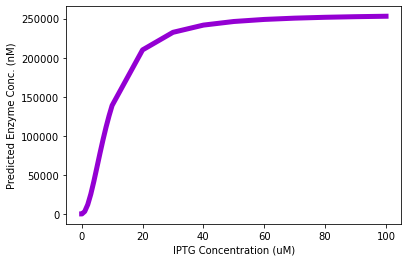

In [121]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
k_TL = 15 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353 ]
k_TCI = 0.23 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353]
k_DMI = 0.462 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353]
k_BI = 12 #[LINK:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2772868/#:~:text=The%20IPTG%20association%20rate%20constant,Figure%205%3B%20Table%203.]
k_DPI =  0.2 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353]
k_FI = 0.12 #[LINK: https://2020.igem.org/Team:ZJU-China/Model#references]
k_TLT7 = 6.116 #[LINK: https://2020.igem.org/Team:ZJU-China/Model#references]
k_DPT7 =0.462 #[LINK: Jayapal, K.P., Sui, S., Philp, R.J., Kok, Y.J., Yap, M.G., Griffin, T.J., and Hu, W.S. (2010) Multitagging proteomic strategy to estimate protein turnover rates in dynamic systems. J Proteome Res 9: 2087–2097. pp.2094-2095 table 1PubMed ID20184388]
k_TCT7 = 0.5 #[LINK: https://2020.igem.org/Team:ZJU-China/Model#references]
k_AFF = 0.2 #[LINK: Hammar P et al. The lac repressor displays facilitated diffusion in living cells. Science. 2012 June 22 336(6088):1595-1598. doi:10.1126/science.1221648 p.1596 left column top paragraphPubMed ID22723426]
k_DMT7 = 0.462 #[LINK:Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network - lMichailStamatakisNikos V.Mantzaris]
k_b = 0.22 #[LINK: https://www.pnas.org/content/110/24/9740]
k_dep2 = 0.2 #[LINK: Hammar P et al. The lac repressor displays facilitated diffusion in living cells. Science. 2012 June 22 336(6088):1595-1598. doi:10.1126/science.1221648 p.1596 left column top paragraphPubMed ID22723426]
k_ub = 28.8 #[LINK: https://www.pnas.org/content/110/24/9740]
k_TLE = 10 
k_LEAKY = 0.01
k_DME = 0.462 #[LINK:Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network - lMichailStamatakisNikos V.Mantzaris]
k_DE = 0.2 #[LINK:Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network - lMichailStamatakisNikos V.Mantzaris]
k_1 = 2365.8 #nM/min[speed of RNA POL translation = 19nt/s]
k_m = 3* 10**5 #[LINK:https://pubmed.ncbi.nlm.nih.gov/3300768/]]
k_TCY = 0.5 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_DMY = 0.462 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_TLY = 30 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_FDIFF = 6*10**4 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_BY = 0.1 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_FY = 0.12 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_DY = 0.2 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_DYI = 0.2 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]
k_PDIFF = 0.92 #[Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network]


# INITIAL CONDITIONS
# genomic part
#d1 = mRNA of LacI   =    20 nM                 
#d2 = LacI = 10
#d3 = (LacI - IPTG) complex = 0
#d4 = mRNA of LacY = 0
#d5 = LacY = 0
#d6 = LacY - IPTG (ex) complex = 0
#d7 = IPTG_intracellular = 0
#d8 = Free LacI = 0
#d9 = mRNA of T7 RNA polymerase = 20
#d10 = RNA polymerase = 830

#PLasmid Part
#d11 = mRNA of LacI= 20 nM
#d12 = LacI = 10
#d13 = (LacI - IPTG) complex = 0
#d14 = mRNA of LacY = 0
#d15 = LacY = 0
#d16 = LacY - IPTG (ex) complex = 0
#d17 =  IPTG_intracellular = 0
#d18 =Free LacI = 0
#d19 =  RNA polymerase binding to promoter = 0
#d20 = mRNA of desired gene = 0
#d21 = desired protein = 0

tf = 100
dt=0.01
t = np.arange(0,tf,dt)

x = [0,10,100,1000,2*10**3,3*10**3,4*10**3,5*10**3,6*10**3,7*10**3,8*10**3,9*10**3,10**4,2*10**4,3*10**4,4*10**4,5*10**4,6*10**4,7*10**4,8*10**4,9*10**4,10**5]#,2*10**5,3*10**5,4*10**5,5*10**5,6*10**5,7*10**5,8*10**5,9*10**5,10**6]#,2*10**6,4*10**6,6*10**6,8*10**6,10**7,2*10**7,4*10**7,6*10**7,8*10**7,10**8]
y =[]
for i in x:
    
    def dD(D,tm):
        
        Da,Db,Dc,Dd,De,Df,Dg,Dh,Di,Dj,Dk,Dl,Dm,Dn,Do,Dp,Dq,Dr,Ds,Dt,Du = D
        d1 = (k_TCI- k_DMI*Da)*1
        d2 = k_TL*Da - k_DPI*Db 
        d3 = k_FI*Db*Dq - k_BI*Dc
        d4 = (k_TCY- k_DMY*Dd)
        d5 = k_TLY*Dd + (k_FDIFF+k_BY)*Df - k_FY*De*i -k_DY*De
        d6 = -(k_FDIFF+k_BY)*Df +k_FY*De*i - k_DYI*Df
        d7 = k_PDIFF*(i - Dq)+ k_FDIFF*Df
        d8=  -(k_FI*Db*(Dq) - k_BI*Dc) +(k_TL*Da - k_DPI*Db)
        d9 = k_TCT7 - k_DMT7*Di - k_AFF*Dh
        d10 = k_TLT7*Di - k_DPT7*Dj
        d11 = (k_TCI- k_DMI*Dk)*40
        d12 = k_TL*Dk - k_DPI*Dl 
        d13 = k_FI*Dl*Dq - k_BI*Dm
        d14 = (k_TCY*83- k_DMY*Dn)
        d15 = k_TLY*Dn + (k_FDIFF+k_BY)*Dp - k_FY*Do*i -k_DY*Do
        d16 = -(k_FDIFF+k_BY)*Dp +k_FY*Do*i - k_DYI*Dp
        d17 = k_PDIFF*(i - Dq)+ k_FDIFF*Dp
        d18=  - (k_FI*Dl*Dq - k_BI*Dm) +(k_TL*Dk - k_DPI*Dl)
        d19 = k_b*Dj - k_ub*Ds - k_AFF*Dr
        d20 = k_LEAKY + k_1*Ds**2/(k_m**2 + Ds**2) - k_DME*Dt
        d21 = k_TLE*Dt - k_DE*Du
        return[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21]
    D = odeint(dD,[20,10,0,0,0,0,0,0,20,830,20,10,0,0,0,0,0,0,0,0,0],t)
    Da=D[:,0]
    Db=D[:,1]
    Dc=D[:,2]
    Dd=D[:,3]
    De=D[:,4]
    Df=D[:,5]
    Dg=D[:,6]
    Dh=D[:,7]
    Di= D[:,8]
    Dj = D[:,9]
    Dk =D[:,10] 
    Dl = D[:,11]
    Dm = D[:,12]
    Dn = D[:,13]
    Do = D[:,14]
    Dp = D[:,15]
    Dq = D[:,16]
    Dr = D[:,17]
    Ds = D[:,18]
    Dt = D[:,19]
    Du =D[:,20] 
    from scipy.signal import find_peaks
    #plt.plot(t,Di,linewidth = 5,color = 'm')
    #plt.xlabel('Time(min)')
    #plt.ylabel('Enzyme conc. (nM)')
    #print(Da)
    #print(Db)
    #print(Dc)
    #print(Dd)
    #print(De)
    #print(Df)
    #print(Dg)
    #print(Dh)
    #print(Di)
    from scipy.signal import find_peaks
    peaks = find_peaks(Du,height = 1)
    #print(peaks)
    #height = peaks[1]['peak_heights']
    #m = np.max(height)
    #print(m)
    y.append(Du[9999])
    #print(height)
x1= [o/10**3 for o in x]    
plt.plot(x1,y,linewidth = 5,color = 'darkviolet')
plt.xlabel('IPTG Concentration (uM)')
plt.ylabel('Predicted Enzyme Conc. (nM)')
print(y)